In [129]:
import numpy  as np
import pandas as pd

In [130]:
root = "https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/"

In [131]:
dados         = pd.read_csv(root + "Dados_totais.csv")
dados_generos = pd.read_csv(root + "data_by_genres.csv")
dados_anos    = pd.read_csv(root + "data_by_year.csv")

- `Acousticness/Acústica`: Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

- `Danceability/Dançabilidade`: Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

- `Duration_ms`: Variável numérica, a duração da trilha em milissegundos.

- `Duration_min`: Variável numérica, a duração da faixa em minutos.

- `Energy/Energia`: Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

- `Explicit/Explícito`: Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

- `Id`: O ID do Spotify para a faixa.

- `Instrumentalness/Instrumentalidade`: Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

- `Key/Chave`: Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

- `Liveness/ Ao vivo`: Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

- `Loudness/ Volume em dB`: Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

- `Mode/ Modo`: Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

- `Popularity/Popularidade`: Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

- `Speechiness/Fala`: Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

- `Tempo`: Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

- `Valence/Valência`: Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

- `Year/Ano`: Ano em que a música foi lançada.

[Fonte](https://github.com/sthemonica/music-clustering/blob/main/Notebooks/Aula%201/Aula%201.3%20-%20Recomendador_de_musicas.ipynb)

## Base de Dados - Geral

In [132]:
dados.head(3)

valence  year  acousticness      artists  danceability  duration_ms  \
0    0.285  2000       0.00239     Coldplay         0.429       266773   
1    0.613  2000       0.14300      OutKast         0.843       270507   
2    0.400  2000       0.00958  Linkin Park         0.556       216880   

   energy  explicit                      id  instrumentalness  key  liveness  \
0   0.661         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1   0.806         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   
2   0.864         0  60a0Rd6pjrkxjPbaKzXjfq          0.000000    3    0.2090   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   
2    -5.870     0   In the End          84       0.0584  105.143   

               artists_song  
0         Coldplay - Yellow  
1     OutKast - Ms. Jackson  
2  Linkin Park - In the End

In [133]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20311 entries, 0 to 20310
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           20311 non-null  float64
 1   year              20311 non-null  int64  
 2   acousticness      20311 non-null  float64
 3   artists           20311 non-null  object 
 4   danceability      20311 non-null  float64
 5   duration_ms       20311 non-null  int64  
 6   energy            20311 non-null  float64
 7   explicit          20311 non-null  int64  
 8   id                20311 non-null  object 
 9   instrumentalness  20311 non-null  float64
 10  key               20311 non-null  int64  
 11  liveness          20311 non-null  float64
 12  loudness          20311 non-null  float64
 13  mode              20311 non-null  int64  
 14  name              20311 non-null  object 
 15  popularity        20311 non-null  int64  
 16  speechiness       20311 non-null  float6

In [134]:
dados['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [135]:
dados['year'].value_counts()

2020    1150
2018    1080
2010    1059
2015    1021
2002    1003
2012     994
2013     986
2011     979
2009     972
2017     969
2006     958
2005     951
2007     944
2004     943
2001     932
2014     927
2019     913
2003     908
2008     900
2000     867
2016     855
Name: year, dtype: int64

In [136]:
dados = dados.drop(columns=['explicit', 'key', 'mode'])

dados.head(3)

valence  year  acousticness      artists  danceability  duration_ms  \
0    0.285  2000       0.00239     Coldplay         0.429       266773   
1    0.613  2000       0.14300      OutKast         0.843       270507   
2    0.400  2000       0.00958  Linkin Park         0.556       216880   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   

          name  popularity  speechiness    tempo              artists_song  
0       Yellow          84       0.0281  173.372         Coldplay - Yellow  
1  Ms. Jackson          80       0.2690   94.948     OutKast - Ms. Jackson  
2   In the End          84       0.0584  105.143  Linkin Park - In the End

In [137]:
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [138]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

## Base de Dados - Gêneros

In [139]:
dados_generos.head(3)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   
2  0.818000          0.876000    0.1260  -9.180000     0.047000  133.444000   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7

In [140]:
dados_generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [141]:
dados_generos = dados_generos.drop(columns=['key', 'mode'])

dados_generos.head(3)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   
2                   8-bit      0.762000      0.712000  1.151770e+05  0.818000   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834    0.3616 -31.514333     0.040567   75.336500  0.103783   
1          0.477762    0.1310 -16.854000     0.076817  120.285667  0.221750   
2          0.876000    0.1260  -9.180000     0.047000  133.444000  0.975000   

   popularity  
0   27.833333  
1   52.500000  
2   48.000000

In [142]:
dados_generos.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [143]:
dados_generos.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

## Base de Dados - Anos

In [144]:
dados_anos.head(3)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0

In [145]:
dados_anos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [146]:
dados_anos['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [147]:
dados_anos = dados_anos.query("year >= 2000")

dados_anos['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [148]:
dados_anos = dados_anos.drop(columns=['key', 'mode'])

dados_anos.head(3)

year  acousticness  danceability    duration_ms    energy  \
79  2000      0.289323      0.590918  242724.642638  0.625413   
80  2001      0.286842      0.583318  240307.796010  0.626986   
81  2002      0.282624      0.576160  239503.283000  0.641270   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
79          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
80          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
81          0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   

    popularity  
79   46.684049  
80   48.750125  
81   48.655500

In [149]:
dados_anos = dados_anos.reset_index(drop='index')

dados_anos.head(3)

year  acousticness  danceability    duration_ms    energy  \
0  2000      0.289323      0.590918  242724.642638  0.625413   
1  2001      0.286842      0.583318  240307.796010  0.626986   
2  2002      0.282624      0.576160  239503.283000  0.641270   

   instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2          0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   

   popularity  
0   46.684049  
1   48.750125  
2   48.655500

In [150]:
dados_anos.isnull().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [151]:
dados_anos.isna().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

# Análise Gráfica

In [152]:
import plotly.express as px

In [153]:
fig = px.line(dados_anos, x='year', y='loudness', markers=True, title='Variação do loudness com passar dos anos')

fig.show()

In [154]:
import plotly.graph_objects as go

In [155]:
fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=dados_anos['year'],
    y=dados_anos['acousticness'],
    name='Acousticness'
  )
)

fig.add_trace(
  go.Scatter(
    x=dados_anos['year'],
    y=dados_anos['valence'],
    name='Valence'
  )
)

fig.add_trace(
  go.Scatter(
    x=dados_anos['year'],
    y=dados_anos['danceability'],
    name='Danceability'
  )
)

fig.add_trace(
  go.Scatter(
    x=dados_anos['year'],
    y=dados_anos['energy'],
    name='Energy'
  )
)

fig.add_trace(
  go.Scatter(
    x=dados_anos['year'],
    y=dados_anos['instrumentalness'],
    name='Instrumentalness'
  )
)

fig.add_trace(
  go.Scatter(
    x=dados_anos['year'],
    y=dados_anos['liveness'],
    name='Liveness'
  )
)
fig.add_trace(
  go.Scatter(
    x=dados_anos['year'],
    y=dados_anos['speechiness'],
    name='Speechiness'
  )
)

fig.show()

In [156]:
fig = px.imshow(dados.corr(), text_auto=True)

fig.show()

# Clusterização por gênero

In [157]:
dados_generos1 = dados_generos.drop(columns=['genres'])

dados_generos1.head(3)

acousticness  danceability   duration_ms    energy  instrumentalness  \
0      0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1      0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2      0.762000      0.712000  1.151770e+05  0.818000          0.876000   

   liveness   loudness  speechiness       tempo   valence  popularity  
0    0.3616 -31.514333     0.040567   75.336500  0.103783   27.833333  
1    0.1310 -16.854000     0.076817  120.285667  0.221750   52.500000  
2    0.1260  -9.180000     0.047000  133.444000  0.975000   48.000000

In [158]:
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 1224
np.random.seed(SEED)

In [159]:
pca_pipeline = Pipeline(
  [
    ('scaler', StandardScaler()),
    ('PCA', PCA(n_components=2, random_state=SEED))
  ]
)

pca_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('PCA', PCA(n_components=2, random_state=1224))])

In [160]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)

genre_embedding_pca

array([[ 5.91026811, -0.01114629],
       [ 2.78709315,  4.49848304],
       [-0.75753754, -1.25849505],
       ...,
       [-0.83251119, -1.08972557],
       [ 1.77479003, -3.69523275],
       [-1.02806916, -1.39070855]])

In [161]:
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

projection

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

# K-Means

In [162]:
from sklearn.cluster import KMeans

## Clusterização por gênero

In [163]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca

KMeans(n_clusters=5, random_state=1224, verbose=True)

In [164]:
kmeans_pca.fit(projection)

Initialization complete
Iteration 0, inertia 4523.567815543695.
Iteration 1, inertia 3668.9855521560253.
Iteration 2, inertia 3624.730925711819.
Iteration 3, inertia 3602.495813758814.
Iteration 4, inertia 3588.0607912404903.
Iteration 5, inertia 3575.4395702593074.
Iteration 6, inertia 3566.3761311630205.
Iteration 7, inertia 3562.5917284574944.
Iteration 8, inertia 3560.314467700935.
Iteration 9, inertia 3558.8854951526523.
Iteration 10, inertia 3558.0027489340523.
Iteration 11, inertia 3557.7295547754934.
Converged at iteration 11: center shift 9.319981044865147e-05 within tolerance 0.0002709886847099651.
Initialization complete
Iteration 0, inertia 3650.5166847646533.
Iteration 1, inertia 3552.8915365648168.
Iteration 2, inertia 3528.9425421232218.
Iteration 3, inertia 3518.849132048711.
Iteration 4, inertia 3512.671791613977.
Iteration 5, inertia 3509.174107824743.
Iteration 6, inertia 3506.3883335513756.
Iteration 7, inertia 3505.091074309408.
Iteration 8, inertia 3504.6465117384

KMeans(n_clusters=5, random_state=1224, verbose=True)

In [165]:
dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca']    = kmeans_pca.predict(projection)

In [166]:
projection

x         y  cluster_pca
0     5.910268 -0.011146            3
1     2.787093  4.498483            3
2    -0.757538 -1.258495            4
3     1.020521 -0.931690            1
4     0.753911 -0.999861            1
...        ...       ...          ...
2968 -0.475136 -0.017126            2
2969 -3.026756 -1.304983            4
2970 -0.832511 -1.089726            4
2971  1.774790 -3.695233            1
2972 -1.028069 -1.390709            4

[2973 rows x 3 columns]

In [167]:
projection['genres'] = dados_generos['genres']

projection

x         y  cluster_pca                  genres
0     5.910268 -0.011146            3  21st century classical
1     2.787093  4.498483            3                   432hz
2    -0.757538 -1.258495            4                   8-bit
3     1.020521 -0.931690            1                      []
4     0.753911 -0.999861            1              a cappella
...        ...       ...          ...                     ...
2968 -0.475136 -0.017126            2                    zolo
2969 -3.026756 -1.304983            4                 zouglou
2970 -0.832511 -1.089726            4                    zouk
2971  1.774790 -3.695233            1            zurich indie
2972 -1.028069 -1.390709            4                  zydeco

[2973 rows x 4 columns]

### Plotando

In [168]:
fig = px.scatter(
  projection,
  x='x',
  y='y',
  color='cluster_pca',
  hover_data=['x', 'y', 'genres']
)

fig.show()

In [169]:
pca_pipeline[1].explained_variance_ratio_

array([0.34986105, 0.14284565])

In [170]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.49270669947266443

Quase 50% dos dados estão "sendo explicados"

In [171]:
pca_pipeline[1].explained_variance_

array([3.84976644, 1.57183087])

In [172]:
pca_pipeline[1].explained_variance_.sum()

5.421597305805701

Cerca de 5 colunas estão sendo explicadas no total das 11

## Clusterização por música

In [173]:
dados.head(3)

valence  year  acousticness      artists  danceability  duration_ms  \
0    0.285  2000       0.00239     Coldplay         0.429       266773   
1    0.613  2000       0.14300      OutKast         0.843       270507   
2    0.400  2000       0.00958  Linkin Park         0.556       216880   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   

          name  popularity  speechiness    tempo              artists_song  
0       Yellow          84       0.0281  173.372         Coldplay - Yellow  
1  Ms. Jackson          80       0.2690   94.948     OutKast - Ms. Jackson  
2   In the End          84       0.0584  105.143  Linkin Park - In the End

In [174]:
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [175]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [176]:
from sklearn.preprocessing import OneHotEncoder

In [177]:
ohe = OneHotEncoder(dtype=int)

In [178]:
dados['artists'].shape

(20311,)

In [179]:
dados[['artists']].shape

(20311, 1)

In [180]:
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()

colunas_ohe

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [181]:
colunas_ohe.shape

(20311, 875)

In [182]:
dados2 = dados.drop(columns=['artists'])

dados2.head(3)

valence  year  acousticness  danceability  duration_ms  energy  \
0    0.285  2000       0.00239         0.429       266773   0.661   
1    0.613  2000       0.14300         0.843       270507   0.806   
2    0.400  2000       0.00958         0.556       216880   0.864   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   
2  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   In the End   

   popularity  speechiness    tempo              artists_song  
0          84       0.0281  173.372         Coldplay - Yellow  
1          80       0.2690   94.948     OutKast - Ms. Jackson  
2          84       0.0584  105.143  Linkin Park - In the End

In [183]:
ohe.get_feature_names_out(['artists'])

array(['artists_$NOT', 'artists_$uicideBoy$', 'artists_*NSYNC',
       'artists_2 Chainz', 'artists_21 Savage', 'artists_2Pac',
       'artists_3 Doors Down', 'artists_311', 'artists_3OH!3',
       'artists_5 Seconds of Summer', 'artists_50 Cent', 'artists_6LACK',
       'artists_6ix9ine', 'artists_A Boogie Wit da Hoodie',
       'artists_A Day To Remember', 'artists_A Perfect Circle',
       'artists_A$AP Ferg', 'artists_A$AP Rocky',
       'artists_A.B. Quintanilla III Y Los Kumbia Kings', 'artists_ABBA',
       'artists_AC/DC', 'artists_AFI', 'artists_AJR', 'artists_Adele',
       'artists_Aesop Rock', 'artists_Akon', 'artists_Akwid',
       'artists_Alabama', 'artists_Alabama Shakes',
       'artists_Alacranes Musical', 'artists_Alan Jackson',
       'artists_Alan Walker', 'artists_Alec Benjamin',
       'artists_Alejandro Fernández', 'artists_Alessia Cara',
       'artists_Alexandre Desplat', 'artists_Alicia Keys',
       'artists_Alina Baraz', 'artists_Alkaline Trio',
       'art

In [184]:
dados_musicas_ohe = pd.concat(
  [
    dados2, 
    pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))
  ],
  axis=1
)

dados_musicas_ohe.head(3)

valence  year  acousticness  danceability  duration_ms  energy  \
0    0.285  2000       0.00239         0.429       266773   0.661   
1    0.613  2000       0.14300         0.843       270507   0.806   
2    0.400  2000       0.00958         0.556       216880   0.864   

                       id  instrumentalness  liveness  loudness  ...  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   

  artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                    0             0              0                  0   
1                    0             0              0                  0   
2                    0             0              0                  0   

  artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                 0                 0                           0   
1                 0                 0                           0   
2                 0                 0                           0   

   artists_fun.  artists_girl in red  artists_iann dior  
0             0                    0                  0  
1             0                    0                  0  
2             0                    0                  0  

[3 rows x 890 columns]

In [185]:
dados_musicas_ohe.shape

(20311, 890)

In [186]:
pca_pipeline = Pipeline(
  [
    ('scaler', StandardScaler()),
    ('PCA', PCA(n_components=0.7, random_state=SEED))
  ]
)

pca_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('PCA', PCA(n_components=0.7, random_state=1224))])

In [187]:
music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_ohe.drop(columns=['id', 'name', 'artists_song']))

music_embedding_pca

array([[ 1.74795539e-01,  7.31251509e-01,  2.18679721e+00, ...,
         1.39299879e-12,  2.89501828e-12, -3.35318609e-12],
       [-1.35842040e+00,  5.29351562e-02, -1.78997285e+00, ...,
         9.64961011e-13,  2.11188464e-12, -2.29857808e-12],
       [-9.72076987e-01,  6.58093816e-01,  7.57500229e-01, ...,
        -6.58942630e-13,  1.39095084e-12, -1.04135741e-12],
       ...,
       [ 7.81916127e-01, -1.16486537e+00,  7.05256204e-01, ...,
         1.27972676e-11,  1.14467316e-11, -2.87181921e-11],
       [ 2.45377664e-03, -3.05640657e+00, -2.72934094e-01, ...,
        -1.28966175e-11, -1.48481155e-11,  3.29787782e-11],
       [-9.57008224e-01, -1.20801562e+00,  1.10314446e+00, ...,
         6.38343307e-15,  4.11271609e-13, -9.57198107e-13]])

In [188]:
projection_musics = pd.DataFrame(data=music_embedding_pca)

projection_musics

0         1         2         3         4         5         6    \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

            7         8         9    ...       602       603       604  \
0     -0.479171 -2.700668  2.109956  ...  0.002516  0.002097 -0.019072   
1      0.821698 -1.716897  0.252498  ...  0.036047 -0.026825 -0.031678   
2      1.839192 -1.562236  1.410677  ... -0.013908  0.007214  0.003084   
3      1.135529 -1.343893  1.020964  ...  0.038784  0.020814 -0.046126   
4      0.479412 -2.125376  0.389565  ...  0.006291  0.003111 -0.009148   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.155320  0.335148  0.103481   
20307 -1.475719 -0.338390  0.272129  ...  0.264741  0.210461 -0.094337   
20308  0.972512  0.900317 -0.674016  ...  0.263781 -0.189241  0.213993   
20309 -0.633245  0.280076  0.521145  ...  0.398941  0.560966 -0.437674   
20310  0.567041 -1.026283  0.266124  ...  0.005936  0.003050 -0.009230   

            605       606       607       608           609           610  \
0     -0.009111  0.005154 -0.034027 -0.032617  1.392999e-12  2.895018e-12   
1     -0.031986  0.029708 -0.016322 -0.030234  9.649610e-13  2.111885e-12   
2      0.017097  0.017361 -0.010979 -0.012781 -6.589426e-13  1.390951e-12   
3      0.089337  0.164777 -0.064148 -0.040911  6.965740e-12  1.739612e-11   
4     -0.011937 -0.004081 -0.017478 -0.010033 -4.932477e-15  3.905602e-13   
...         ...       ...       ...       ...           ...           ...   
20306 -0.235355 -0.054256  0.016922 -0.125947 -1.534309e-11  3.021976e-11   
20307 -0.183026  0.074605  0.005622  0.000054 -4.055856e-12 -5.412007e-14   
20308 -0.033420 -0.157564  0.213849 -0.065180  1.279727e-11  1.144673e-11   
20309 -0.784640  0.080684  0.038379  0.108493 -1.289662e-11 -1.484812e-11   
20310 -0.012069 -0.003818 -0.017675 -0.010372  6.383433e-15  4.112716e-13   

                611  
0     -3.353186e-12  
1     -2.298578e-12  
2     -1.041357e-12  
3     -4.817632e-12  
4     -8.923707e-13  
...             ...  
20306 -3.889940e-11  
20307  2.466938e-11  
20308 -2.871819e-11  
20309  3.297878e-11  
20310 -9.571981e-13  

[20311 rows x 612 columns]

In [189]:
pca_pipeline[1].n_components_

612

In [190]:
kmeans_pca_musics = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_musics

KMeans(n_clusters=50, random_state=1224, verbose=False)

In [191]:
kmeans_pca_musics.fit(projection_musics)

KMeans(n_clusters=50, random_state=1224, verbose=False)

In [193]:
dados['cluster_pca']             = kmeans_pca_musics.predict(projection_musics)
projection_musics['cluster_pca'] = kmeans_pca_musics.predict(projection_musics)

In [194]:
projection_musics['artist'] = dados['artists']
projection_musics['song']   = dados['artists_song']

In [195]:
projection_musics

0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  1.392999e-12  2.895018e-12 -3.353186e-12           39   
1     -0.030234  9.649610e-13  2.111885e-12 -2.298578e-12           27   
2     -0.012781 -6.589426e-13  1.390951e-12 -1.041357e-12           27   
3     -0.040911  6.965740e-12  1.739612e-11 -4.817632e-12           27   
4     -0.010033 -4.932477e-15  3.905602e-13 -8.923707e-13           27   
...         ...           ...           ...           ...          ...   
20306 -0.125947 -1.534309e-11  3.021976e-11 -3.889940e-11           13   
20307  0.000054 -4.055856e-12 -5.412007e-14  2.466938e-11           13   
20308 -0.065180  1.279727e-11  1.144673e-11 -2.871819e-11           37   
20309  0.108493 -1.289662e-11 -1.484812e-11  3.297878e-11           13   
20310 -0.010372  6.383433e-15  4.112716e-13 -9.571981e-13           13   

              artist                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

In [197]:
fig = px.scatter(
  projection_musics,
  x=0,
  y=1,
  color='cluster_pca',
  hover_data=[0, 1, 'song']
)

fig.show()

In [198]:
fig = px.scatter_3d(
  projection_musics, 
  x=0, 
  y=1, 
  z=2,
  color='cluster_pca',
  hover_data=[0, 1, 2, 'song']
)

fig.show()

In [200]:
pca_pipeline[1].explained_variance_ratio_

array([0.00435434, 0.00288706, 0.00224307, 0.00195745, 0.00165119,
       0.00157155, 0.00146394, 0.00142497, 0.00135635, 0.00128669,
       0.00124209, 0.00116929, 0.00113661, 0.00113594, 0.00113526,
       0.00113458, 0.00113406, 0.00113375, 0.0011328 , 0.00113268,
       0.00113263, 0.00113253, 0.0011324 , 0.00113234, 0.00113228,
       0.00113226, 0.00113185, 0.00113178, 0.00113171, 0.00113162,
       0.00113144, 0.00113139, 0.00113133, 0.00113129, 0.00113127,
       0.00113126, 0.00113122, 0.00113119, 0.00113116, 0.00113114,
       0.0011311 , 0.00113102, 0.00113095, 0.00113092, 0.0011309 ,
       0.00113088, 0.00113084, 0.00113082, 0.00113082, 0.0011308 ,
       0.00113078, 0.00113072, 0.00113065, 0.00113062, 0.00113061,
       0.0011306 , 0.00113057, 0.00113055, 0.00113053, 0.00113051,
       0.0011305 , 0.00113049, 0.00113047, 0.00113044, 0.00113041,
       0.0011304 , 0.00113039, 0.00113037, 0.00113036, 0.00113034,
       0.00113034, 0.00113033, 0.00113028, 0.00113027, 0.00113

In [199]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187029

In [201]:
pca_pipeline[1].explained_variance_

array([3.86248727, 2.56094767, 1.98969947, 1.73634553, 1.46467989,
       1.39403206, 1.29857958, 1.26400685, 1.20314377, 1.14134803,
       1.10179108, 1.03721164, 1.00821978, 1.00763107, 1.0070223 ,
       1.00642507, 1.00595666, 1.00568938, 1.00484063, 1.00473859,
       1.00468841, 1.00460655, 1.00448828, 1.00443709, 1.00438541,
       1.0043616 , 1.00399969, 1.00393535, 1.0038772 , 1.00380012,
       1.00363238, 1.00359295, 1.00353562, 1.00350523, 1.00348426,
       1.00347517, 1.00344186, 1.00341577, 1.00338787, 1.0033732 ,
       1.00333337, 1.00326121, 1.00320028, 1.00317758, 1.00315948,
       1.00313761, 1.00310037, 1.00309   , 1.00308555, 1.00306512,
       1.00305474, 1.00299526, 1.00293968, 1.00290951, 1.00290382,
       1.00289126, 1.00286062, 1.00284343, 1.00282834, 1.00281257,
       1.00280078, 1.00279086, 1.00277804, 1.00275333, 1.00272169,
       1.00271784, 1.00270139, 1.00269109, 1.00268295, 1.00266247,
       1.00266077, 1.00264824, 1.00260822, 1.00260124, 1.00259

# Recomendação

In [202]:
nome_musica = 'Ed Sheeran - Shape of You'

In [204]:
caracteristicas_musica = projection_musics.query("song == @nome_musica")

caracteristicas_musica

0         1         2         3         4         5         6  \
2463 -0.826954 -2.939691 -0.988516 -0.887905  1.878541  1.248659  1.541844   

             7        8        9  ...       605      606       607       608  \
2463  0.630208 -0.89796 -0.87699  ... -0.036472 -0.02506 -0.033319 -0.013805   

               609           610           611  cluster_pca      artist  \
2463  5.346067e-13  1.255766e-12 -5.345855e-12           13  Ed Sheeran   

                           song  
2463  Ed Sheeran - Shape of You  

[1 rows x 615 columns]

In [209]:
cluster_musica = caracteristicas_musica['cluster_pca'].values[0]

cluster_musica

13

In [218]:
x_musica = caracteristicas_musica.iloc[:, 0].values[0]
y_musica = caracteristicas_musica.iloc[:, 1].values[0]
z_musica = caracteristicas_musica.iloc[:, 2].values[0]

coords_musica = [x_musica, y_musica, z_musica]

coords_musica

[-0.826954290231059, -2.939691407289046, -0.9885161510367195]

In [211]:
musicas_recomendadas = projection_musics.query("cluster_pca == @cluster_musica")

musicas_recomendadas

0         1         2         3         4         5         6  \
99     0.344956 -0.618546 -2.569574 -1.577506 -0.080221  0.684931  0.330835   
145    0.065651  0.147763 -0.535276 -1.015890  0.518103  0.440585  0.183675   
164   -1.555157 -0.128530 -1.759088 -1.184402  0.172312  1.639418  0.614860   
169    0.154462  0.536985  0.133278 -1.162678  0.319179  0.048122 -0.301145   
187   -0.214625  0.844827  0.254697 -0.916666  0.820123  0.901196 -0.888477   
...         ...       ...       ...       ...       ...       ...       ...   
20304 -1.290731 -3.601878 -0.417021  3.003210 -1.811359 -0.093402 -2.835037   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
99     0.052892 -0.260299 -1.765379  ... -0.057620 -0.677704 -0.497641   
145    1.064013  0.193183 -0.038417  ...  0.038867  0.029039  0.007478   
164    0.432480 -1.564067  0.728632  ... -0.019188  0.031585 -0.031499   
169    0.394057  0.159132  0.145225  ...  0.038862  0.029071  0.007408   
187    0.442179 -0.708690 -0.251570  ...  0.070794 -0.002812 -0.098416   
...         ...       ...       ...  ...       ...       ...       ...   
20304 -0.216757 -0.945769 -0.215920  ... -0.290371  0.086884 -0.040727   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
99     0.478662 -1.211037e-11  2.843298e-11  3.060714e-10           13   
145    0.012564 -6.400570e-13  2.441995e-12  1.664059e-12           13   
164   -0.035066 -2.746035e-13  1.341093e-12 -7.446290e-12           13   
169    0.012573 -6.371928e-13  2.440019e-12  1.655295e-12           13   
187   -0.088710  9.421089e-13  1.244404e-11 -2.204335e-11           13   
...         ...           ...           ...           ...          ...   
20304 -0.031647 -2.511529e-12  4.410699e-12  1.223929e-11           13   
20306 -0.125947 -1.534309e-11  3.021976e-11 -3.889940e-11           13   
20307  0.000054 -4.055856e-12 -5.412007e-14  2.466938e-11           13   
20309  0.108493 -1.289662e-11 -1.484812e-11  3.297878e-11           13   
20310 -0.010372  6.383433e-15  4.112716e-13 -9.571981e-13           13   

                       artist                                     song  
99     Los Cadetes De Linares  Los Cadetes De Linares - Flor de Capomo  
145             Blake Shelton                  Blake Shelton - Ol' Red  
164                   Shakira             Shakira - Whenever, Wherever  
169             Blake Shelton                   Blake Shelton - Austin  
187          Enrique Iglesias                  Enrique Iglesias - Hero  
...                       ...                                      ...  
20304                  Polo G           Polo G - Trials & Tribulations  
20306                   Bazzi           Bazzi - I Don't Think I'm Okay  
20307           Bryson Tiller       Bryson Tiller - Timeless Interlude  
20309                   Gunna           Gunna - NASTY GIRL / ON CAMERA  
20310                  Eminem                        Eminem - Darkness  

[6996 rows x 615 columns]

In [216]:
from sklearn.metrics.pairwise import euclidean_distances

In [217]:
musicas_recomendadas[[0, 1, 2]]

0         1         2
99     0.344956 -0.618546 -2.569574
145    0.065651  0.147763 -0.535276
164   -1.555157 -0.128530 -1.759088
169    0.154462  0.536985  0.133278
187   -0.214625  0.844827  0.254697
...         ...       ...       ...
20304 -1.290731 -3.601878 -0.417021
20306  1.346699 -2.775889  0.986755
20307  1.269387 -2.444619  0.971408
20309  0.002454 -3.056407 -0.272934
20310 -0.957008 -1.208016  1.103144

[6996 rows x 3 columns]

In [220]:
distancias = euclidean_distances(musicas_recomendadas[[0, 1, 2]], [coords_musica])

distancias

array([[3.04316164],
       [3.24569688],
       [3.00444458],
       ...,
       [2.91222312],
       [1.10163417],
       [2.71857667]])

In [222]:
musicas_recomendadas['id']         = dados['id']
musicas_recomendadas['distancias'] = distancias

/tmp/ipykernel_3661/1437169863.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3661/1437169863.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
recomendado = musicas_recomendadas.sort_values('distancias').head(10)

recomendado

0         1         2         3         4         5         6  \
2463  -0.826954 -2.939691 -0.988516 -0.887905  1.878541  1.248659  1.541844   
17156 -0.846706 -2.863550 -1.129471  0.095692 -0.469900  0.584241  0.728596   
7617  -0.777715 -2.790271 -1.105086  0.047057 -1.497022 -0.222040 -0.667857   
13482 -0.663006 -2.841267 -0.919545  2.856415 -0.673322 -0.243969 -0.235983   
2674  -0.684617 -3.066304 -0.882083  0.059463 -0.606501  0.310032 -0.687528   
11428 -0.929555 -3.011464 -1.202850 -0.744657 -1.127861 -0.126467 -0.221070   
9615  -0.590989 -3.017254 -1.017122  1.237713 -1.025100  0.065212 -1.406349   
18657 -0.967648 -2.887684 -0.767242 -1.403178  0.453358  1.615664  1.078377   
11573 -0.685970 -3.183506 -1.052015  1.460021 -1.282629 -0.520078 -1.831161   
13296 -0.557195 -2.836045 -1.026344  2.231530 -2.070524 -1.020259 -0.147917   

              7         8         9  ...       607       608           609  \
2463   0.630208 -0.897960 -0.876990  ... -0.033319 -0.013805  5.346067e-13   
17156  0.771791  0.302669 -1.838172  ...  0.568934  0.163544  9.055383e-12   
7617  -0.511837  0.844763 -1.106814  ...  0.008525 -0.003201 -4.080374e-13   
13482 -0.428167  0.824830  1.568865  ...  0.004204  0.012241 -5.684965e-13   
2674  -1.006814  0.674742  1.559911  ...  0.023193  0.025638 -7.403005e-13   
11428  0.757536 -0.288393  0.761538  ...  0.016243 -0.026633  3.628124e-13   
9615  -0.074543  0.221083 -1.016065  ...  0.043859  0.093738 -5.756796e-12   
18657  1.073601  0.487111 -0.553359  ...  0.503898  0.160072 -1.532773e-10   
11573 -1.050428  0.202781 -0.326509  ...  0.043719  0.093714 -5.756717e-12   
13296 -0.517427  0.343490  1.302980  ...  0.181520  0.170202 -1.388156e-11   

                610           611  cluster_pca                      artist  \
2463   1.255766e-12 -5.345855e-12           13                  Ed Sheeran   
17156  3.186148e-12 -4.079023e-11           13                        KYLE   
7617   4.766554e-13  2.958036e-12           13  YoungBoy Never Broke Again   
13482 -1.010128e-12  3.241099e-12           13                      Future   
2674   1.587798e-12  5.423379e-12           13                 Kodak Black   
11428  7.704093e-13 -3.774746e-13           13                XXXTENTACION   
9615   1.214504e-11  3.340281e-11           13                    Rod Wave   
18657  1.572696e-11  4.525219e-10           13                Charlie Puth   
11573  1.216060e-11  3.338168e-11           13                    Rod Wave   
13296 -7.017535e-11  6.475715e-11           13      Ski Mask The Slump God   

                                         song                      id  \
2463                Ed Sheeran - Shape of You  7qiZfU4dY1lWllzX7mPBI3   
17156   KYLE - What It Is (feat. Chris Brown)  26rIWI1QTPClaOOI4Kbxhe   
7617         YoungBoy Never Broke Again - 3am  6Gf7OQmh3Ra5XJkF4Vug4d   
13482                       Future - No Issue  7L95O7D34EWhwtDCQkwGMR   
2674          Kodak Black - Calling My Spirit  2MShy1GSSgbmGUxADNIao5   
11428       XXXTENTACION - Looking for a Star  1B3TX5FbmcVROMv2riOwyE   
9615                   Rod Wave - Cuban Links  4ovta8hB5ymzzsR5EaCEdx   
18657               Charlie Puth - Girlfriend  1UNs8AlFM8c0uAkSyjIW3P   
11573                 Rod Wave - Heart 4 Sale  6JjCS3FuQ1VpRuqKJ5Z33W   
13296  Ski Mask The Slump God - Life Is Short  7t2eWdGWBTAxaXxaGqq9ts   

       distancias  
2463     0.000000  
17156    0.161419  
7617     0.195804  
13482    0.203281  
2674     0.218217  
11428    0.248228  
9615     0.250027  
18657    0.267323  
11573    0.288711  
13296    0.291450  

[10 rows x 617 columns]

## Integração com Spotify

In [226]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [227]:
scope = "user-library-read plailyst-modify-private"

In [228]:
OAuth = SpotifyOAuth(
  scope=scope,
  redirect_uri="http://localhost/8888:callback",
  client_id="9a6b3df5091f47a3a066e4f9fcdb30a8",
  client_secret="2d5b024f801648d8964a9722dab444a0"
)

In [230]:
client_credentials_manager = SpotifyClientCredentials(
  client_id="9a6b3df5091f47a3a066e4f9fcdb30a8",
  client_secret="2d5b024f801648d8964a9722dab444a0"
)

In [231]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [233]:
import matplotlib.pyplot as plt
from skimage import io

In [237]:
id = dados.query("artists_song == @nome_musica")['id'].iloc[0]

id

'7qiZfU4dY1lWllzX7mPBI3'

In [238]:
track = sp.track(id)

track

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'},
    'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V',
    'id': '6eUKZXaKkcviH0Ku9w2n3V',
    'name': 'Ed Sheeran',
    'type': 'artist',
    'uri': 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
 

In [240]:
url = track['album']['images'][1]['url']

url

'https://i.scdn.co/image/ab67616d00001e02ba5db46f4b838ef6027e6f96'

In [242]:
name = track['name']

name

'Shape of You'

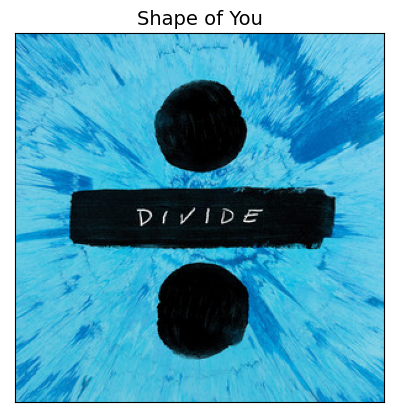

In [246]:
image = io.imread(url)

plt.imshow(image)

plt.title(name, fontsize=14)
plt.xticks([])
plt.yticks([])

plt.show()

In [247]:
def recommend_id(playlist_id):
  url  = []
  name = []

  for id in playlist_id:
    track = sp.track(id)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])
  
  return name, url

In [249]:
name, url = recommend_id(recomendado['id'])

In [250]:
name

['Shape of You',
 'What It Is (feat. Chris Brown)',
 '3am',
 'No Issue',
 'Calling My Spirit',
 'Looking for a Star',
 'Cuban Links (feat. Kevin Gates)',
 'Girlfriend',
 'Heart 4 Sale',
 'Life Is Short']

In [251]:
url

['https://i.scdn.co/image/ab67616d00001e02ba5db46f4b838ef6027e6f96',
 'https://i.scdn.co/image/ab67616d00001e02b46b5fb6fdc6f5c720fcb183',
 'https://i.scdn.co/image/ab67616d00001e02dd03ab7388c62f590380bf94',
 'https://i.scdn.co/image/ab67616d00001e02644c510e8d4c02ae69028297',
 'https://i.scdn.co/image/ab67616d00001e02f9508eb3070b95ceeb82788b',
 'https://i.scdn.co/image/ab67616d00001e025485ea186d6971e18fabcc2f',
 'https://i.scdn.co/image/ab67616d00001e02dd0f669cabce2ccd16594f9e',
 'https://i.scdn.co/image/ab67616d00001e02eeb1236a7d65549de3657457',
 'https://i.scdn.co/image/ab67616d00001e02216d9569130ad67b9585d147',
 'https://i.scdn.co/image/ab67616d00001e02bed1058bc2c26075a503ec95']

In [259]:
def visualize_songs(name, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url): 
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])

        # Colocando o nome da música no eixo x
        plt.title(name[i], fontsize = 10)


        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

    plt.show()

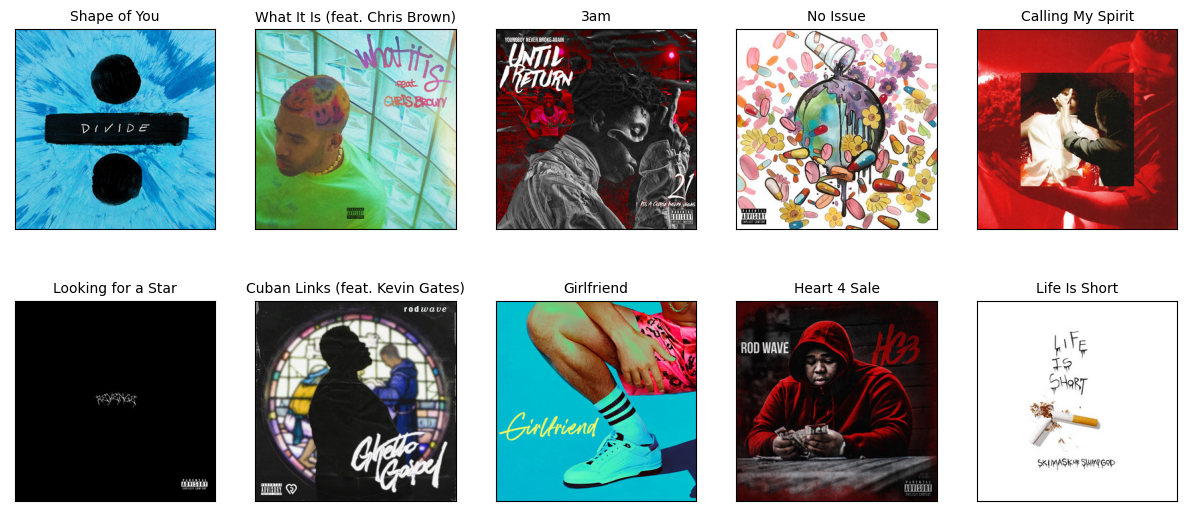

In [260]:
visualize_songs(name, url)

In [268]:
def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_musics[projection_musics['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_musics[projection_musics['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_musics[projection_musics['song']== nome_musica][0])[0]
  y_musica = list(projection_musics[projection_musics['song']== nome_musica][1])[0]
  
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      plt.xticks([])
      plt.yticks([])
      plt.title(name[i], fontsize = 8)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.tick_params(bottom = False)
  plt.show()

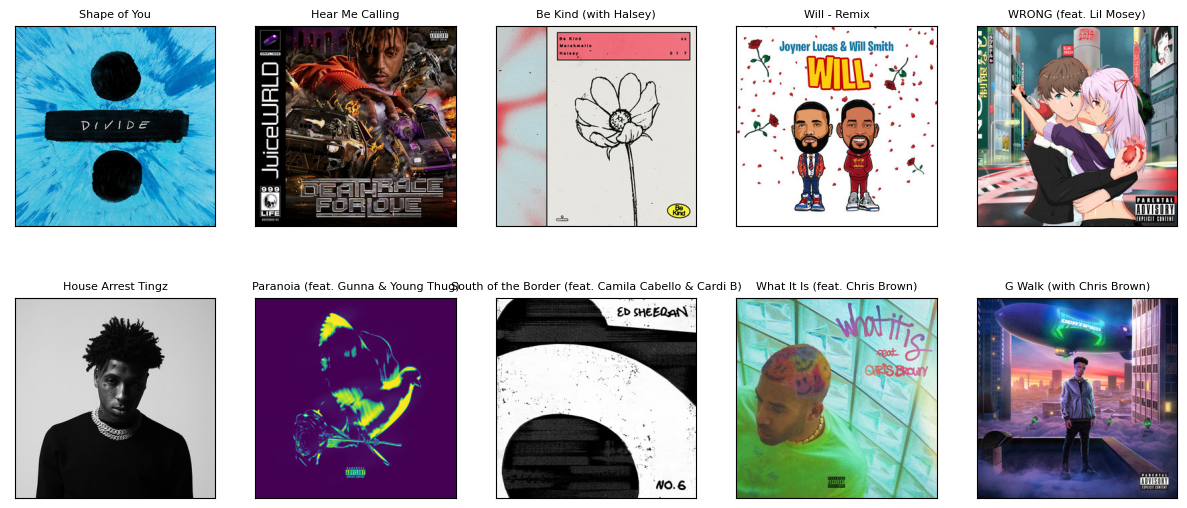

In [269]:
recomendador(nome_musica)